### Переобучение, недообучение практика

<b>Задание 4.3</b>
<br>Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

In [1]:
# Загрузка необходимых библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для обработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from imblearn.over_sampling import SMOTE #алгоритм сэмплирования
# Устанавливаем стиль визуализаций в matplotlib
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (15, 8))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

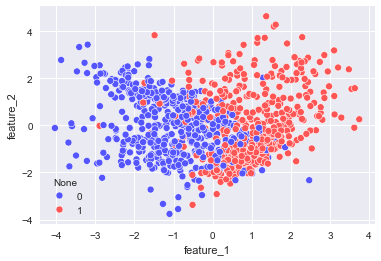

In [3]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

In [4]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_valid.shape}')

Train shape: (700, 2)
Test shape: (300, 2)


In [5]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    max_depth=10 #ограничиваем глубину дерева
    ) 
model.fit(X_train, y_train) # обучаем модель на тренирововчной выборке

#Деалем предсказания для тренировочной и валидационной выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Вычисляем значение метрик для выборок
print('-'*40)
print(f'{" " * 10}Train F1-score {metrics.accuracy_score(y_train, y_train_pred):.2}')
print(f'{" " * 10}Valid F1-score {metrics.accuracy_score(y_valid, y_valid_pred):.2}')
print('-'*40)


----------------------------------------
          Train F1-score 0.98
          Valid F1-score 0.83
----------------------------------------


c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


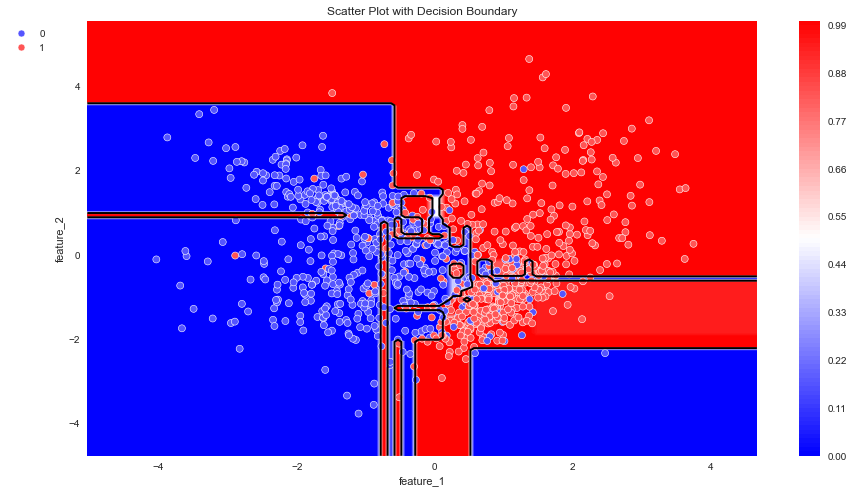

In [6]:
# визуализируем модель после взвешивания объектов
plot_probabilities_2d(X, y, model)

Модель переобучена

In [7]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       346
           1       0.97      0.99      0.98       354

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700



In [8]:
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       153
           1       0.83      0.82      0.83       147

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Задание 4.6<br>
Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 4.3.
<br>Обучите модель дерева решений с глубиной 3 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.
<br>Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.
<br>В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

In [9]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    max_depth=3 #ограничиваем глубину дерева
    ) 
model.fit(X_train, y_train) # обучаем модель на тренирововчной выборке

#Деалем предсказания для тренировочной и валидационной выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

In [10]:
print(f'Accuracy for train: {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy for valid: {metrics.accuracy_score(y_valid, y_valid_pred)}')

Accuracy for train: 0.88
Accuracy for valid: 0.85


c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


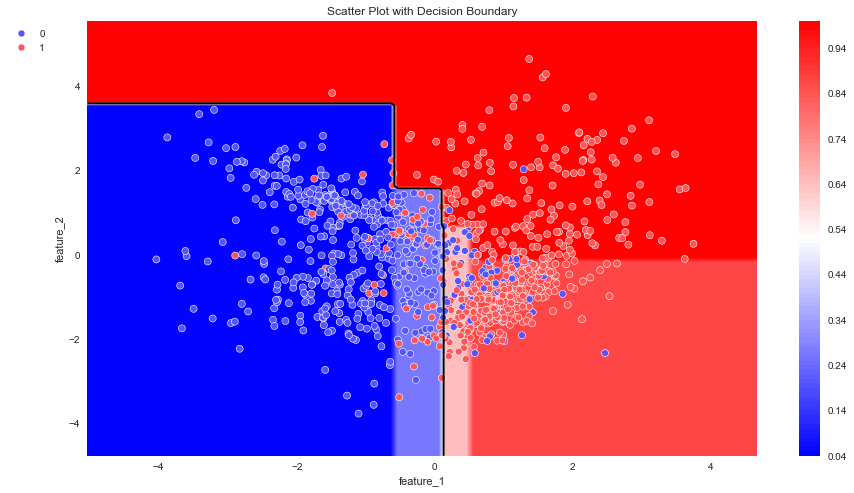

In [11]:
plot_probabilities_2d(X, y, model)